In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # 忽略警告
%matplotlib inline

In [2]:
# 导入数据
train = pd.read_csv('traindata.csv')
test = pd.read_csv('predictdata.csv')

In [3]:
train.head()

,channel,region,fresh,milk,grocery,frozen,detergents_Paper,delicassen,id
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,5


In [4]:
test.head()

,channel,region,fresh,milk,grocery,frozen,detergents_Paper,delicassen,id
0,1,3,796,5878,2109,340,232,776,360
1,1,3,19746,2872,2006,2601,468,503,361
2,1,3,4734,607,864,1206,159,405,362
3,1,3,2121,1601,2453,560,179,712,363
4,1,3,4627,997,4438,191,1335,314,364


In [5]:
# 去除最后一列 id 列
x_train = train.iloc[:, :-1]
x_train.head()

,channel,region,fresh,milk,grocery,frozen,detergents_Paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# 导入独热编码器
from sklearn.preprocessing import OneHotEncoder
# 截取前两列 channel 和 region 列
train_labels = x_train.iloc[:,0:2]
train_labels.head()

,channel,region
0,2,3
1,2,3
2,2,3
3,1,3
4,2,3


In [7]:
# 使用编码器对截取列转换
train_labels = OneHotEncoder().fit_transform(train_labels).toarray()
# 输出转换成 DataFrame，以便对数据进行后续处理
train_labels = pd.DataFrame(train_labels)
# 将字段名进行重新命名
train_labels.columns=['channel_a','channel_b','region_A','region_B','region_C']
train_labels.head()

,channel_a,channel_b,region_A,region_B,region_C
0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [8]:
# 连接 x_train 和 train_labels，axis=1 表示横向连接 
x_train=pd.concat([x_train,pd.DataFrame(train_labels)],axis=1) 
# 删除 channel 和 region 列，inplace 表示删除结果替换原 x_train 数据 
x_train.drop(['channel','region'],axis=1,inplace=True) 
x_train.head()

,fresh,milk,grocery,frozen,detergents_Paper,delicassen,channel_a,channel_b,region_A,region_B,region_C
0,12669,9656,7561,214,2674,1338,0.0,1.0,0.0,0.0,1.0
1,7057,9810,9568,1762,3293,1776,0.0,1.0,0.0,0.0,1.0
2,6353,8808,7684,2405,3516,7844,0.0,1.0,0.0,0.0,1.0
3,13265,1196,4221,6404,507,1788,1.0,0.0,0.0,0.0,1.0
4,22615,5410,7198,3915,1777,5185,0.0,1.0,0.0,0.0,1.0


In [9]:
# 删除测试集id列
x_test = test.iloc[:, :-1]
# 获取前两列
test_labels = x_test.iloc[:,0:2]
# 独热编码适配
enc = OneHotEncoder().fit(test_labels) # 独热编码转换
test_labels = enc.transform(test_labels).toarray()
# 将结果转换为 DataFrame
test_labels = pd.DataFrame(test_labels)
test_labels.head()

,0,1,2
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,1.0


In [10]:
# 连接 test_labels 和 pd.DataFrame(np.zeros((81,2))，axis=1 表示横向连接 
test_labels = pd.concat([test_labels,pd.DataFrame(np.zeros((81,2)))],axis=1)
test_labels.head()

,0,1,2,0,1
0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0


In [11]:
# 将字段名进行重新命名
test_labels.columns =['channel_a','channel_b','region_C','region_A','region_B'] 
# 连接 x_test 和 test_labels，axis=1 表示横向连接
x_test = pd.concat([x_test,test_labels],axis=1)
# 删除 channel 和 region 列，inplace 表示删除结果替换原 x_test 数据 
x_test.drop(['channel','region'],axis=1,inplace=True)
x_test.head()

,fresh,milk,grocery,frozen,detergents_Paper,delicassen,channel_a,channel_b,region_C,region_A,region_B
0,796,5878,2109,340,232,776,1.0,0.0,1.0,0.0,0.0
1,19746,2872,2006,2601,468,503,1.0,0.0,1.0,0.0,0.0
2,4734,607,864,1206,159,405,1.0,0.0,1.0,0.0,0.0
3,2121,1601,2453,560,179,712,1.0,0.0,1.0,0.0,0.0
4,4627,997,4438,191,1335,314,1.0,0.0,1.0,0.0,0.0


In [12]:
# 导入 KMeans
from sklearn.cluster import KMeans
# 选定 K 值
Ks=[2,3,4,5,6,7,8]
# 初始化 inertias 列表
inertias = list()
for i in Ks:
    cluster=KMeans(n_clusters=i).fit(x_train)
    # 在遍历时将当前簇内平方和添加到 inertias 中
    inertias.append(cluster.inertia_)
inertias

[103301256128.99171,
 72777511879.04749,
 58257355896.009186,
 47273325822.03383,
 41058656992.350235,
 36304766645.39413,
 31793433613.885777]

<function matplotlib.pyplot.show>

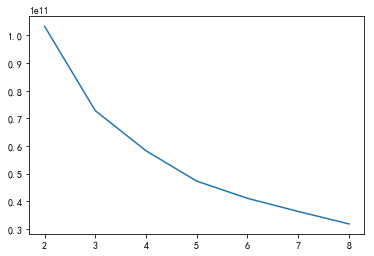

In [13]:
# x 方向为 Ks，y 方向为 inertias 
plt.plot(Ks,inertias) 
plt.show

In [14]:
# 导入轮廓系数
from sklearn.metrics import silhouette_score
# 初始化 silhouette_scores 列表
silhouette_scores = list()
for i in Ks:
    cluster=KMeans(n_clusters=i).fit(x_train)
    # 在遍历时将当前轮廓系数添加到 silhouette_scores 中
    silhouette_scores.append(silhouette_score(x_train,cluster.labels_)) 
silhouette_scores

[0.531283806022905,
 0.4875998534502868,
 0.4010601049235997,
 0.3582379612429775,
 0.3653667557667733,
 0.3460457480535148,
 0.32846411999733705]

<function matplotlib.pyplot.show>

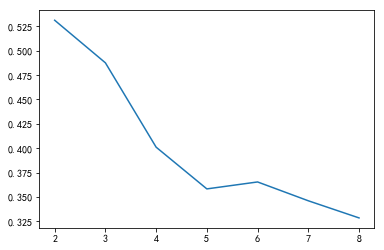

In [15]:
# x 方向为 Ks，y 方向为 silhouette_scores
plt.plot(Ks, silhouette_scores)
plt.show

<function matplotlib.pyplot.show>

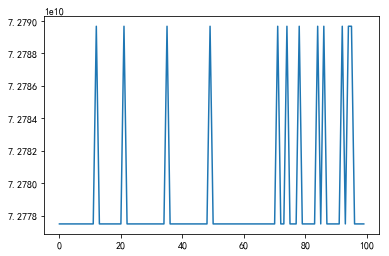

In [16]:
# 初始化 inertias 列表 
inertias = list()
# 遍历100次
for i in range(100):
    cluster=KMeans(n_clusters=3).fit(x_train) 
    # 在遍历时将当前簇内平方和添加到 inertias 中 
    inertias.append(cluster.inertia_)
    
import matplotlib.pyplot as plt
# x 方向为 range(100)，y 方向为 inertias 
plt.plot(range(100),inertias) 
plt.show

In [17]:
# 构建模型，指定 K=3 
model=KMeans(n_clusters=3) 
# 使用训练集 
cluster=model.fit(x_train)
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [18]:
inertia_ = cluster.inertia_
inertia_

72789661075.5536

In [19]:
# 对测试集进行预测，并得到聚类结果 y_pred
y_pred=model.predict(x_test) 
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2], dtype=int32)

In [22]:
# 获取簇的中心坐标 
centers=model.cluster_centers_
centers

array([[7.97317391e+03, 1.88453696e+04, 2.81684130e+04, 2.01684783e+03,
        1.28396087e+04, 2.26706522e+03, 2.17391304e-02, 9.78260870e-01,
        2.17391304e-01, 1.73913043e-01, 6.08695652e-01],
       [3.88449535e+04, 6.16769767e+03, 6.56530233e+03, 7.19144186e+03,
        1.12897674e+03, 3.50944186e+03, 8.83720930e-01, 1.16279070e-01,
        2.09302326e-01, 9.30232558e-02, 6.97674419e-01],
       [8.46150741e+03, 3.96848889e+03, 5.48733333e+03, 2.58411852e+03,
        1.89171852e+03, 1.16826296e+03, 7.14814815e-01, 2.85185185e-01,
        2.14814815e-01, 1.29629630e-01, 6.55555556e-01]])

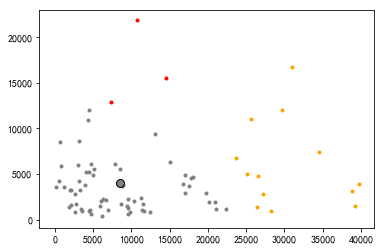

In [23]:
# 指定颜色 
colors=['red','orange','gray'] 
plt.figure()
for j in range(3):
    # 聚类标签为j的索引
    index_set=np.where(y_pred==j)
    # 根据索引，选中训练集
    cluster=x_test.iloc[index_set]
    # 指定 x 方向为 cluster 第 0 列，y 方向为 cluster 第 1 列，颜色为 colors 第 j 列，标记类型为点状 
    plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.')
    # 指定 x 方向为 cluster 第 0 列，y 方向为 cluster 第 1 列，标记类型为球状，颜色为 colors 第 j列，黑边，大小为 8
plt.plot(centers[j][0],centers[j][1],'o',markerfacecolor=colors[j],markeredgecolor='k' ,markersize=8)
plt.show()

In [24]:
from sklearn.decomposition import PCA 
# 指定降维目标维度数为 2
pca = PCA(n_components=2)
# 输入测试集，获取降维后的测试集 
reduce_test = pca.fit_transform(x_test)
# 将降维结果转换为 DataFrame 格式 
reduce_test = pd.DataFrame(reduce_test) 
reduce_test.shape

(81, 2)

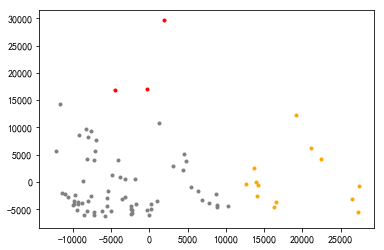

In [26]:
colors=['red','orange','gray']
plt.figure()
for j in range(3):
    # 获取聚类标签为j的索引
    index_set=np.where(y_pred==j)
    # 根据索引，选中降维后的测试集
    cluster=reduce_test.iloc[index_set]
    # 指定 x 方向为 cluster 第 0 列，y 方向为 cluster 第 1 列，颜色为 colors 第 j 列，标记类型为点 状
    plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=colors[j],marker='.') # 选取某两 个特征为坐标轴
plt.show()